In [8]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt


In [9]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [24]:
tf.config.list_physical_devices('GPU')

[]

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data/PokemonData/')

Found 6820 files belonging to 150 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

In [16]:
import os
import cv2
import numpy as np

# Define the path to the folder containing subfolders with images
data_dir = "./data/PokemonData/"

# Create lists to store images and labels
images = []
labels = []

# Iterate through subfolders
for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    
    # Skip non-directory entries
    if not os.path.isdir(label_path):
        continue
    
    # Assign a unique integer label to each subfolder
    class_label = len(labels)
    
    # Iterate through image files in the subfolder
    for image_file in os.listdir(label_path):
        image_path = os.path.join(label_path, image_file)
        
        # Attempt to read the image
        image = cv2.imread(image_path)
        
        if image is not None:
            # Resize the image to a common size (e.g., 224x224)
            image = cv2.resize(image, (224, 224))
            
            # Normalize pixel values (0-255) to the range (0-1)
            image = image / 255.0
            
            # images.append(image)
            labels.append(label)
        else:
            print(f"Failed to read image: {image_path}")
            os.remove(image_path)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)



In [17]:
labels[:23]

array(['Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra',
       'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra',
       'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra'],
      dtype='<U16')

In [18]:
# image_index = 4556  # Change this to the index of the image you want to view

# Display the image and its label
def showImage(image_index):
    plt.imshow(images[image_index])
    plt.title(f"Label: {labels[image_index]}")
    plt.show()



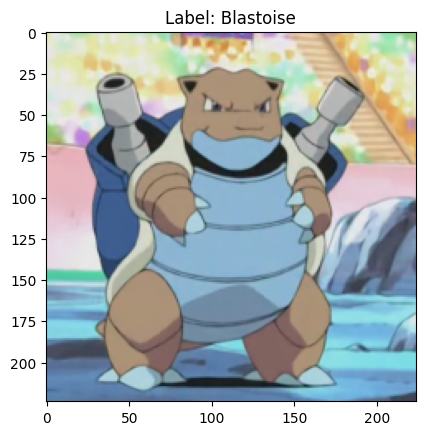

In [32]:
showImage(356)

In [6]:
# pip install scikit-learn


In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)


TypeError: Singleton array array(<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
      dtype=object) cannot be considered a valid collection.

array(['Hitmonchan', 'Dragonite', 'Dewgong', ..., 'Sandslash', 'Seaking',
       'Dewgong'], dtype='<U16')

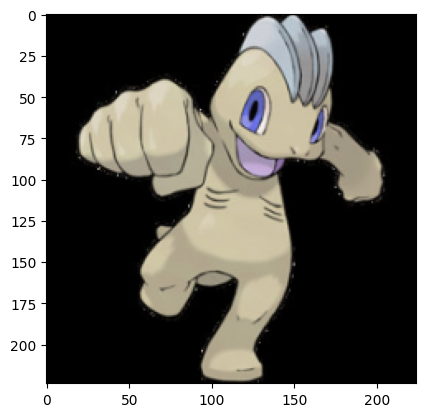

In [36]:
# train_images[0].shape
plt.imshow(train_images[24])
train_labels

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define your CNN model
model = keras.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(150, activation='softmax')  # Adjust num_classes based on your problem
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using your training data
model.fit(train_images, train_labels, epochs=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')


MemoryError: Unable to allocate 5.36 GiB for an array with shape (4777, 224, 224, 3) and data type float64

In [ ]:
import cv2
import numpy as np

# Load the new image (make sure it's preprocessed similarly to your training data)
new_image = cv2.imread("path_to_new_image.jpg")
new_image = cv2.resize(new_image, (224, 224))
new_image = new_image / 255.0
new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension

# Use your trained model to make a prediction
predictions = model.predict(new_image)

# If you're doing classification, you can get the class label with the highest probability
predicted_class = np.argmax(predictions)

# You can also get the class label names if you have a mapping
class_names = ["class1", "class2", "class3"]  # Replace with your class labels
predicted_class_name = class_names[predicted_class]

print(f"Predicted class: {predicted_class_name}")
print(f"Predicted class: {predicted_class}")


In [ ]:
# Save the model
model.save("my_cnn_model.h5")

# Load the model
loaded_model = tf.keras.models.load_model("my_cnn_model.h5")

# Use the loaded model for predictions
predictions = loaded_model.predict(new_image)
